##Ejercicio 1.

Graficar la potencia media de una impedancia  $R+jwL$ , cuándo es excitada por una fuente sinusoidal

Graficar la potencia media de una impedancia $R-j\frac{1}{wC} $, cuándo es excitada por una fuente sinusoidal.

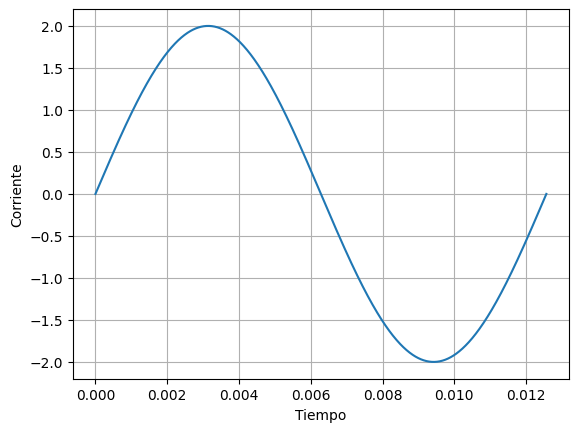

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *


w = 500
L = 0.01
R = 4
Imax = 2
T0 = 2*np.pi/w
N = 1000

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)
plt.xlabel('Tiempo')
plt.ylabel('Corriente')
plt.grid()
plt.plot(t,i)



Text(0, 0.5, 'Amplitud')

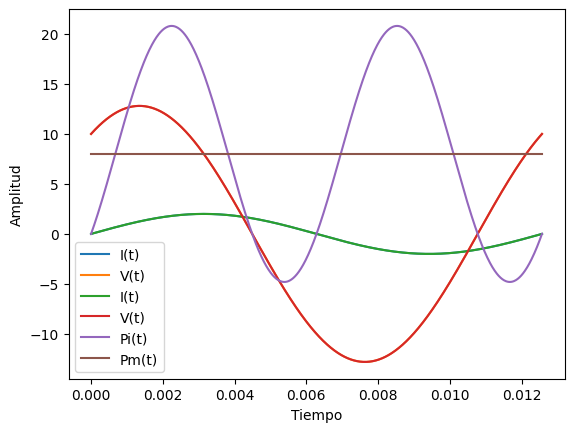

In [6]:
Vmax = np.sqrt((R**2)+((w*L)**2))*Imax
ang = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + ang)


plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

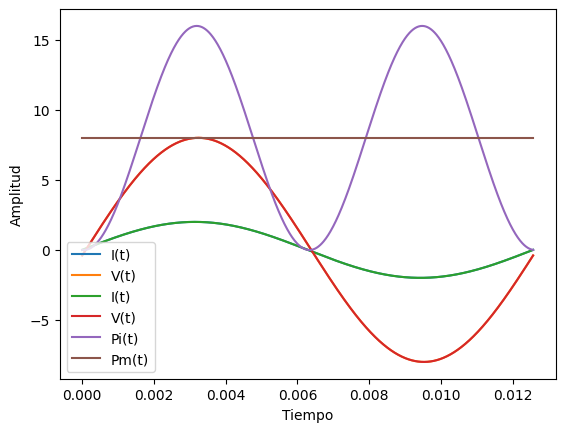

In [8]:

C = 0.01
Vmax = np.sqrt((R**2)+(1/((w*C)**2)))*Imax
ang = -np.arctan(1/(w*C*R))

v = Vmax*np.sin(w*t + ang)


plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')


##Ejercicio 3

Finalmente, clasifique la señal $x(t) = e^{-\alpha t}~t$ como de energía o de potencia. *Compruebe el resultado solucionando la integral por partes.*

Ayuda: declare la función en la variable **x** en el siguiente bloque de código como se muestra a continuación.


In [10]:
t = symbols('t', Real = True) #definir la variable t
a = symbols('a', Real = True, nonzero = True, nonnegative = True) #a > 0 y diferente de 0
x = exp(-a*t)* t #función
E = integrate(x**2, (t, -oo, oo)) #integral
print('La energía total es:')
E


La energía total es:


oo

In [12]:
#para hallar la potencia media
T = symbols("T", Real = True)
Pmd = limit(integrate(x**2, (t, -T/2, T/2)) / T, T, oo)
print('\nLa potencia media es:')
Pmd



La potencia media es:


oo

##Ejercicio 4.

La distancia entre dos señales $x_1(t)$ y $x_2(t)$ se puede dar en términos de la potencia media de la diferencia entre ellas; es decir, la potencia media del error.

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t$) dos señales periódicas de periodo fundamental $T_0$ como se muestra a continuación.

$$
x_1(t) = \cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}\\
x_2(t)= \left\{ \begin{array}{lcc}
             ~~~1 &   si  & 0 \leq t < \frac{T}{4} \\
             \\ -1 &  si &  \frac{T}{4} \leq t < \frac{3T}{4} \\
             \\ ~~~1 &  si  & \frac{3T}{4} \leq t < T
             \end{array}
   \right.
$$

Determine la distancia entre las dos señales.

In [15]:
# Definir símbolos y señales
t, B, T =symbols("t B T ", Real=True)

parte1 = (1, (0 <= t) & (t <= T/4))
parte2 = (-1, (T/4 < t) & (t <= (3*T)/4))
parte3 = (1, ((3*T)/4 < t) & (t <= T))

x2 = sym.Piecewise(parte1, parte2, parte3)
Wo = 2*sym.pi/T
x1 = sym.cos(Wo*t)

x1

cos(2*pi*t/T)

In [16]:
x2

Piecewise((1, (t >= 0) & (t <= T/4)), (-1, (t <= 3*T/4) & (t > T/4)), (1, (T >= t) & (t > 3*T/4)))

In [17]:
A = 1
x2 = A*(sym.Heaviside(t) - sym.Heaviside(t-T/4)) -  A*(sym.Heaviside(t-T/4) - sym.Heaviside(t-3*T/4)) +  A*(sym.Heaviside(t-3*T/4) - sym.Heaviside(t-T))
x2

Heaviside(t) - Heaviside(-T + t) + 2*Heaviside(-3*T/4 + t) - 2*Heaviside(-T/4 + t)

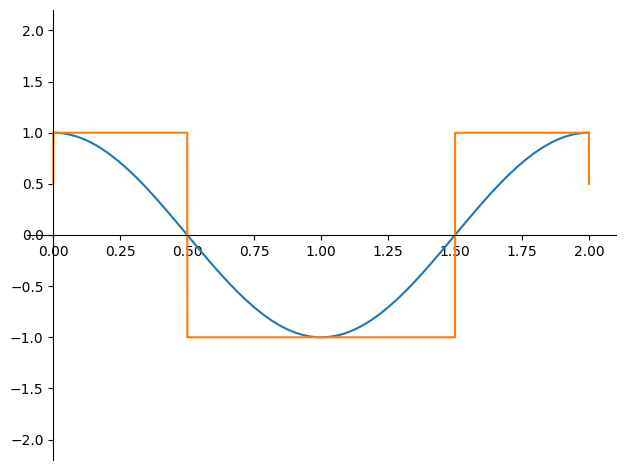

In [22]:
#integrando  con sympy
P1 = (1/T)*sym.integrate(x1**2, (t, 0, T))
P3 = (1/T)*sym.integrate(A**2, (t, 0, T))
P2 = -(2/T)*(sym.integrate(x1*A, (t, 0, T/4))-sym.integrate(x1*A, (t, T/4,3*T/4))+sym.integrate(x1*A, (t, 3*T/4,T)))
P_ = P1 + P2 + P3
P_
#graficando
p1 = sym.plot(x1.subs({B:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'', xlabel = '', show=False);
p2 = sym.plot(x2.subs({A:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'',show=False);

p1.extend(p2)#se extiende los gráficos sobre una misma figura
p1.show()